In [31]:
!pip install openpyxl

In [32]:
import pandas as pd

file_path = '/content/drive/MyDrive/task delay predictor/dataset.xlsx'

df = pd.read_excel(file_path, engine='openpyxl', skiprows=9, usecols=list(range(3, pd.read_excel(file_path, engine='openpyxl', skiprows=9, nrows=0).shape[1])))

df.head()

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,X1.1,X1.2,X1.3,X1.4,X1.5,X1.6,X1.7,X1.8,X1.9,X2.1,...,X10.2,X10.3,X10.4,X10.5,X10.6,X10.7,Y1,Y2,Y3,Y4
0,5,5,5,5,5,5,5,5,5,4,...,5,5,5,5,5,5,4,5,5,5
1,5,5,5,5,5,5,5,5,5,5,...,3,3,3,3,3,4,5,5,5,5
2,4,5,3,4,4,2,5,2,4,4,...,5,5,3,3,3,5,4,4,4,5
3,4,4,4,4,4,4,4,4,4,5,...,4,4,4,4,4,4,3,3,4,4
4,5,5,5,5,5,5,5,5,5,4,...,4,5,3,3,3,3,4,4,4,4


In [33]:
df.info()

print(df.isnull().sum())

df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1.1    68 non-null     int64
 1   X1.2    68 non-null     int64
 2   X1.3    68 non-null     int64
 3   X1.4    68 non-null     int64
 4   X1.5    68 non-null     int64
 5   X1.6    68 non-null     int64
 6   X1.7    68 non-null     int64
 7   X1.8    68 non-null     int64
 8   X1.9    68 non-null     int64
 9   X2.1    68 non-null     int64
 10  X2.2    68 non-null     int64
 11  X2.3    68 non-null     int64
 12  X3.1    68 non-null     int64
 13  X3.2    68 non-null     int64
 14  X3.3    68 non-null     int64
 15  X3.4    68 non-null     int64
 16  X4.1    68 non-null     int64
 17  X4.2    68 non-null     int64
 18  X4.3    68 non-null     int64
 19  X4.4    68 non-null     int64
 20  X4.5    68 non-null     int64
 21  X5.1    68 non-null     int64
 22  X5.2    68 non-null     int64
 23  X5.3    68 non-nu

In [34]:
feature_cols = [col for col in df.columns if col.startswith('X')]

# Set target variable (choose Y1, Y2, Y3, or Y4 — we'll use Y1 for now)
target_col = 'Y1'

X = df[feature_cols]
y = df[target_col]


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         5

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



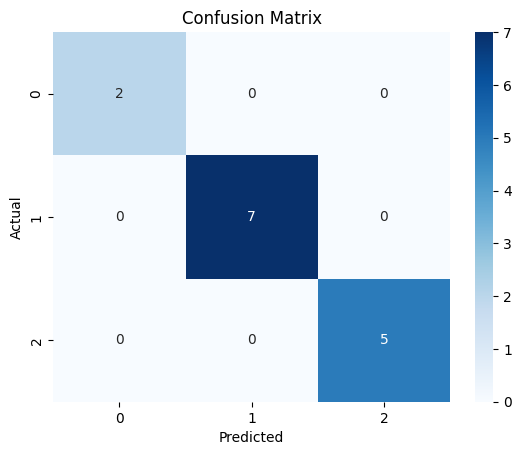

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


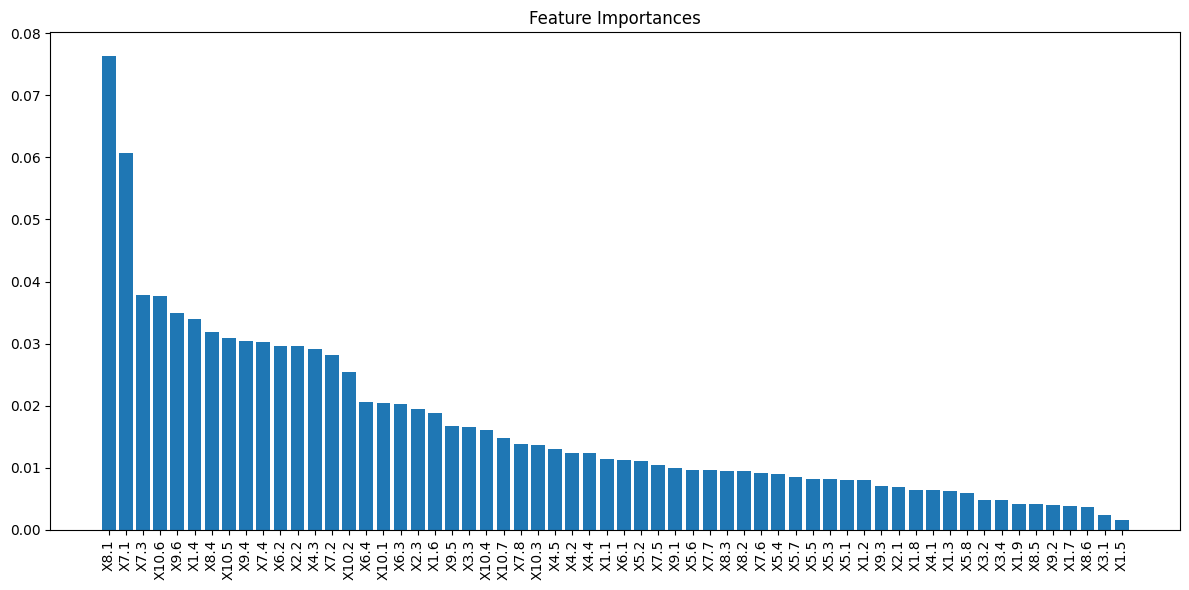

In [38]:
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


In [39]:
# Save the trained model and label encoders
joblib.dump(rf, "random_forest_project_delay_model.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")
print("Model and encoders saved successfully.")


Model and encoders saved successfully.


In [40]:
import joblib

joblib.dump(rf, '/content/drive/MyDrive/task delay predictor/rf_model_y1.pkl')


['/content/drive/MyDrive/task delay predictor/rf_model_y1.pkl']